## COSC 3337 - HW3 - Ujwal Joshi

### Problem Statement

A business provides you with the following data and wants you to find patterns in their customer's habits so that they can make better recommendations and target certain groups in the future.  

Answer the following:  
Would we approach this as a supervised or unsupervised learning task and why?  
**answer:** We should approach this as a unsupervised learning task because since the business wants us to find clear patterns and trends in the habits rather than providing a concrete or definitite answer for a question.

### About The Data
- ID
- Gender
- Spending Score
- Age
- Income

### Step 1
Begin by importing the data and displaying the first 5 observations. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers_df = pd.read_csv('data_h3_3337.csv')
customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Answer the following using Pandas:  
How many observations are there in total?

In [5]:
print(f'There are {customers_df.shape[0]} observations in total')

There are 200 observations in total


Are there any missing values? 

In [6]:
customers_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no null values in the dataset.  

How many unique values are in each column?

In [7]:
unique_vals_pd = pd.DataFrame({
    'Unique Value Count': customers_df.apply(lambda col: len(col.unique())),
    'Unique Values': customers_df.apply(lambda col: col.unique())
})

unique_vals_pd

,Unique Value Count,Unique Values
CustomerID,200,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
Gender,2,"[Male, Female]"
Age,51,"[19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2..."
Annual Income (k$),64,"[15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2..."
Spending Score (1-100),84,"[39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,..."


### Step 2 (visualizations)

Create the following plots: A histogram of Age, Annual Income (k$), and Spending Score (1-100). 

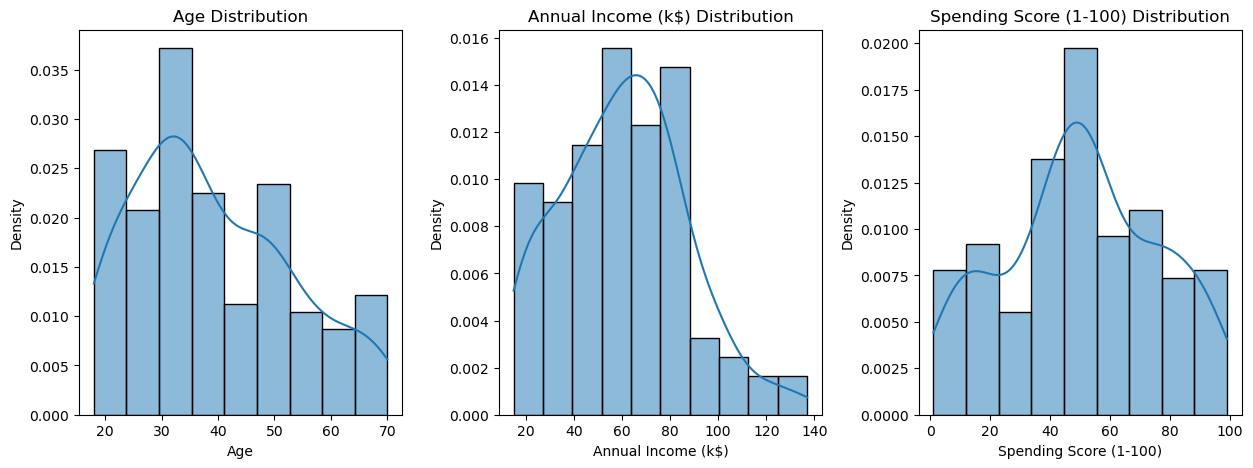

In [23]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), gridspec_kw={'wspace': 0.3})

for i, col in enumerate(cols):
    sns.histplot(data=customers_df, x=col, stat="density", kde=True, ax=axes[i])
    axes[i].set_title(f'{col} Distribution')

plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  
**answer:** The distribution of both Age and Annual Income seem slightly right skewed while Spending Score does not (relatively) seem that skewed.

Create a pie chart showing the proportions of male to female in our data.

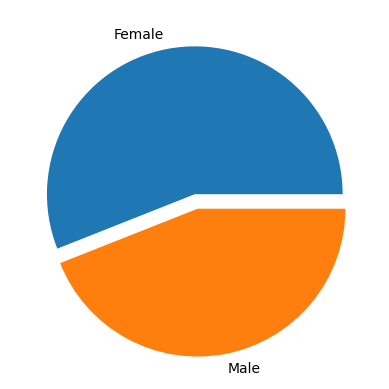

In [33]:
gender_proportions = customers_df['Gender'].value_counts().to_dict()

plt.pie(gender_proportions.values(), labels=gender_proportions.keys(), explode=(0, 0.1))
plt.show()

Answer the following:  
What can you conclude from the plot you created?   
**answer:** There are far more data points in this dataset that are Female compared to Men.

Create a heatmap of the data. 

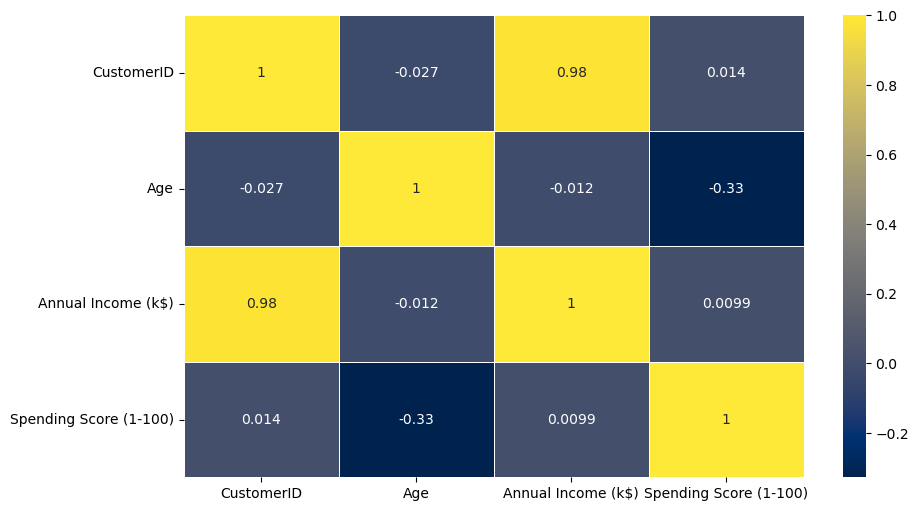

In [44]:
plt.figure(figsize=(10, 6))
sns.heatmap(customers_df.drop(columns=['Gender']).corr(), annot=True, cmap='cividis', linewidth=0.5)
plt.show()

Answer the following:  
After creating your heatmap, is there anything interesting? For example, any significant multicollinearity?  
**answer:** There seems to be significant multicollinearity between customerID and Annual Income.

Create the following plots: A scatter plot of Age vs. Annual Income (k$), Age vs. Spending Score (1-100), and Annual Income (k$) vs. Spending Score (1-100).

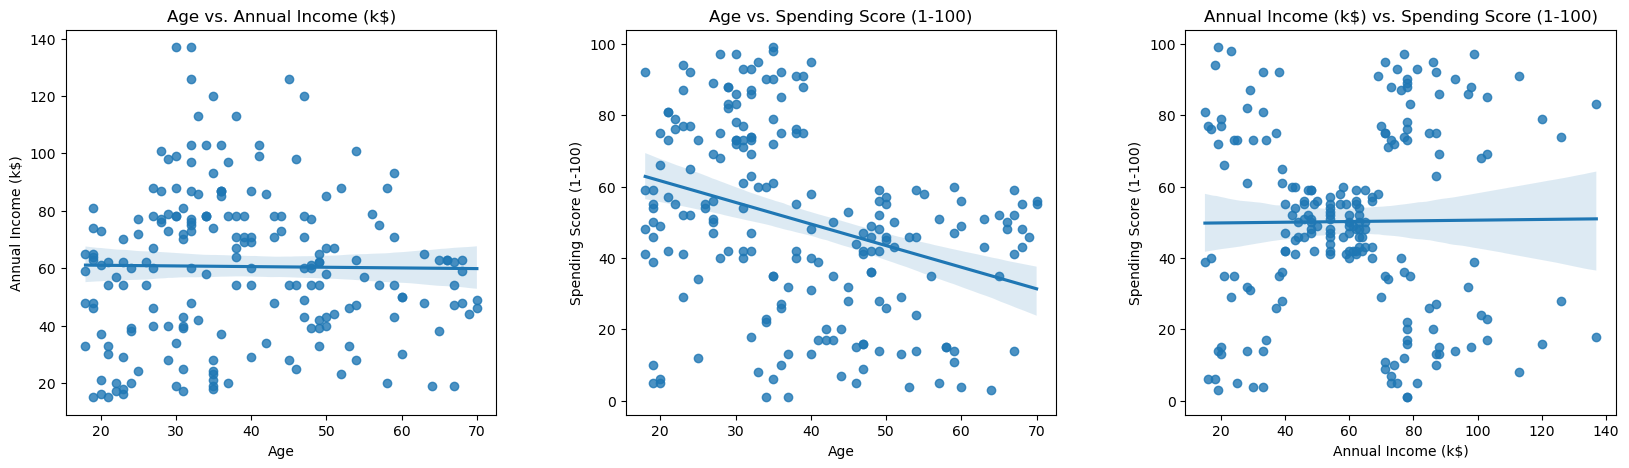

In [48]:
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5), gridspec_kw={'wspace': 0.3})

sns.regplot(data=customers_df, x=cols[0], y=cols[1], ax=axes[0])
axes[0].set_title(f'{cols[0]} vs. {cols[1]}')

sns.regplot(data=customers_df, x=cols[0], y=cols[2], ax=axes[1])
axes[1].set_title(f'{cols[0]} vs. {cols[2]}')

sns.regplot(data=customers_df, x=cols[1], y=cols[2], ax=axes[2])
axes[2].set_title(f'{cols[1]} vs. {cols[2]}')

plt.show()

Answer the following:  
What can you conclude from the plots you created? Are there any interesting findings?  
**answer:** Neither Age and Annual Income nor Annual Income and Spending Score seem to have any form of linear relationship, however Age and Spending Score seem to have a weak negative linear relationship. The data implies that younger customers seem to generally have a higher spending score than older customers.

Create a line graph of Annual Income (k$) vs. Spending Score (1-100) for both genders. 

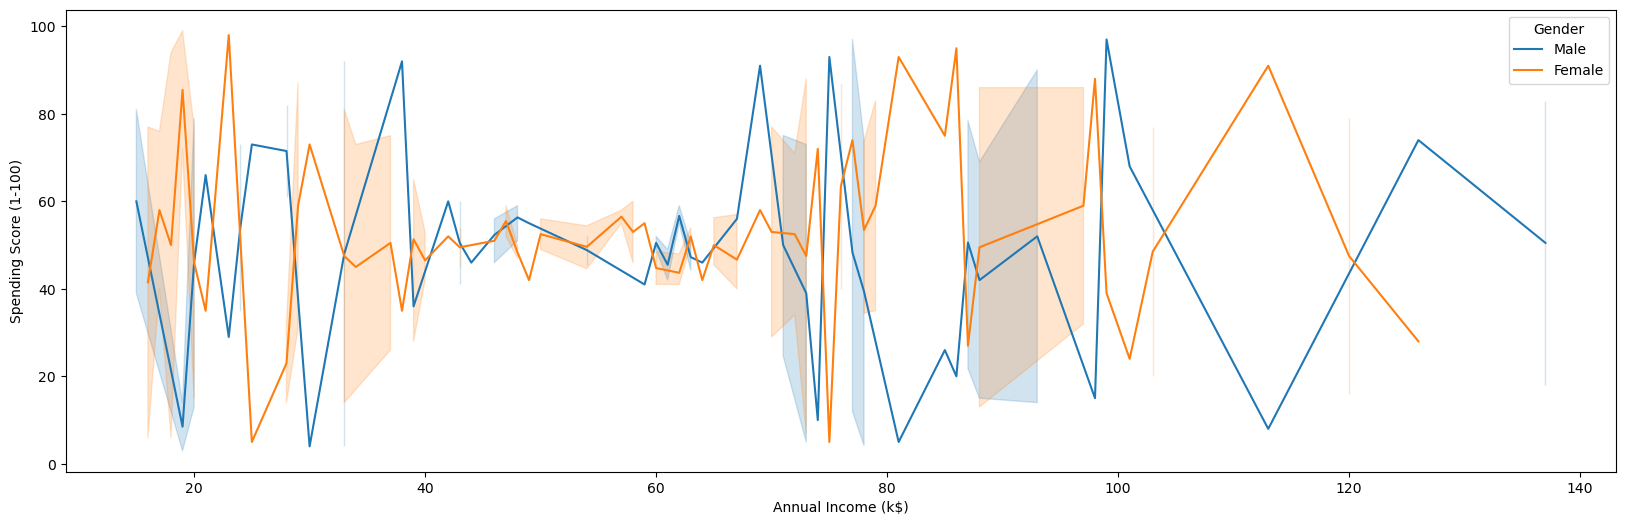

In [60]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=customers_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.show()

Answer the following:  
What can you say about the plot you created?  
**answer:** Annual income and Spending Score seem to have some form of inverse relationship when accounting for Male vs. Female.

### Step 3 (k-means clustering)  

For visualization purposes, only use spending score and income for the remaining portion
of this homework. For this step, perform the following:
- Use the elbow method to find the optimal number of clusters.
- Create a K-Means model using your optimal number of clusters
- Visualize the clusters by plotting them (annual income on one axis and spending score on the other)

Note: refer back to labs if you’re having trouble creating the clusters for step 3 and 4.

In [12]:
# using only spending score and income
X = customers_df[['Spending Score (1-100)', 'Annual Income (k$)']]
X.head()

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


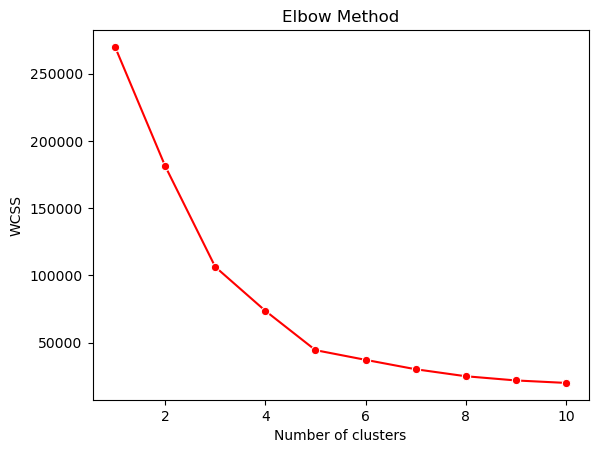

In [14]:
# using elbow method to find optimal number of clusters
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings("ignore")

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

sns.lineplot(x=range(1, 11), y=wcss,marker='o',color='red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

warnings.resetwarnings()

In [15]:
# K means model using 5 clusters (the "elbow point")
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X.values)

c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Ujwal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


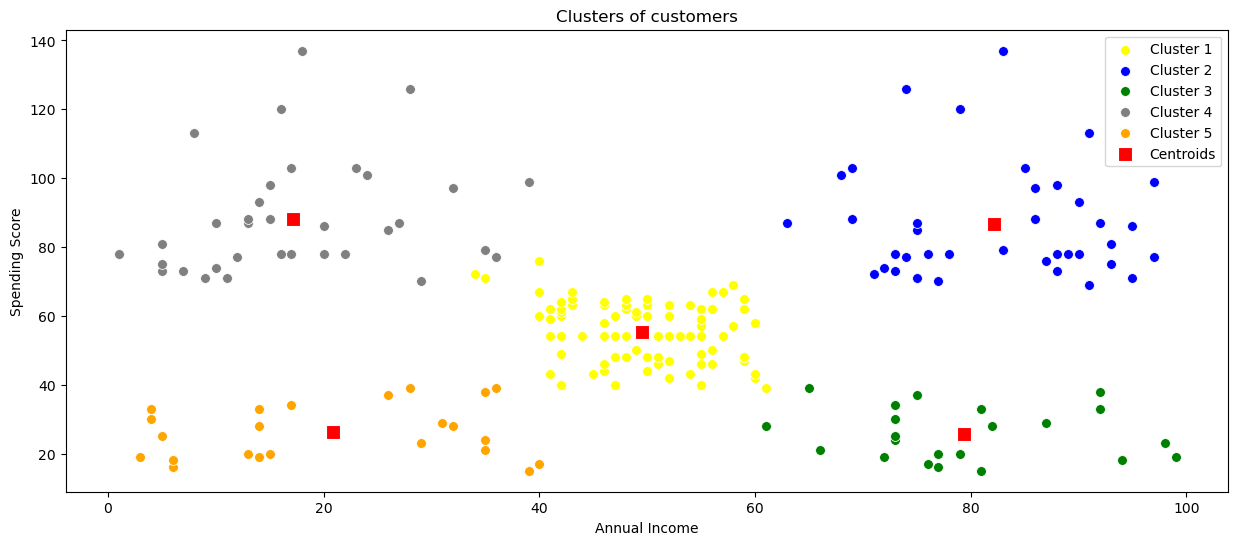

In [28]:
# clusters visualization
plt.figure(figsize=(15, 6))
sns.scatterplot(x=X.values[y_pred == 0, 0], y=X.values[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(x=X.values[y_pred == 1, 0], y=X.values[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(x=X.values[y_pred == 2, 0], y=X.values[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(x=X.values[y_pred == 3, 0], y=X.values[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(x=X.values[y_pred == 4, 0], y=X.values[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s=100,marker=',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

### Step 4 (Hierarchical Clustering)  

Perform the following:
- Create a Dendrogram to find the optimal number of clusters. Use method = 'ward'.  
Hint: Look at the old lab on hierarchical clustering or scipy.cluster.hierarchy
- Visualizing the Clusters of hierarchical clustering

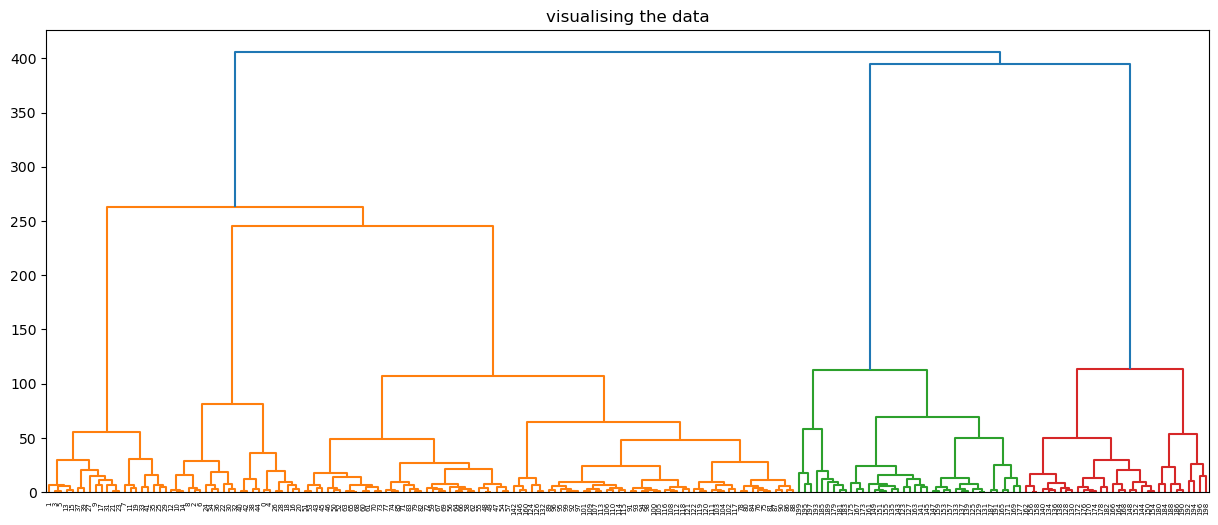

In [31]:
# Dendrogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 6))
plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X.values, method ='ward'))) 

In [32]:
# building a hierarchical clustering model with optimal number of clusters being 3
from sklearn.cluster import AgglomerativeClustering 

agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X.values)

AgglomerativeClustering(n_clusters=3)

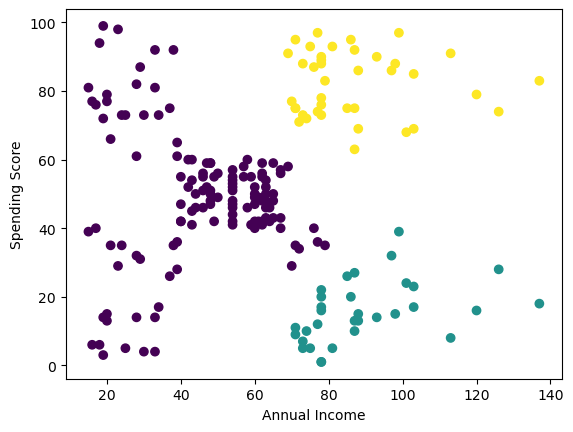

In [38]:
# Visualizing the clustering
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c = agg.fit_predict(X.values)) 
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show() 

### Step 5 (conclusion)  
Write a brief conclusion summarizing your results and how K-Means and Hierarchical clustering differed.  
  
Answer the following:  
- Briefly explain how both k-means and hierarchical clustering work along with their advantages/disadvantages if any.
- Give an example of where you could use hierarchical clustering or k-means.

**answer**:  
Based on the K-means clustering we can see 5 clusters, with two significant groups of people who have a very high spending score but are either very low or high income. There are also a group of customers who have moderate income and moderate spending hapits, while several customers with varied income who do not spend much. However there are far less customers in that last group compared to the other clusters.  

The 3 groups of customers presented in the hierarchal clustering model seems to also follow a similar story, with two groups of customers who have either a very high spedning score or a very low spending score while having high income. With a significant third group who spend moderately and have moderate income while some small various samples have low income but have varied spending habits.

The conclusion drawn from the two models suggest that income affects spending habits only up to a certain point and there is a ceiling at which point high income seems to not have as strong an impact on a customer's spending score.

K-means splits data into groups by repeatedly assigning points to the nearest center, while hierarchical clustering builds a tree of clusters by merging or splitting them. K-means is quick and simple but picky about starting points, while hierarchical clustering is flexible but can be slow and tricky to read. As an example, k-means can be used in customer segmentation for targeted marketing like we have done in this assignment, while hierarchical clustering can classify organisms into a hierarchical taxonomy based on genetic similarities.